In [63]:
#imports 

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series, DataFrame

np.random.RandomState(42)
plt.style.use('seaborn-v0_8')

In [3]:
#fetching datasets from uci repo

from ucimlrepo import fetch_ucirepo

In [4]:
#dataframe
abalone = fetch_ucirepo(id = 1)

In [15]:
#input features
X = abalone.data.features

In [16]:
#output labels
y = abalone.data.targets

In [24]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output = False)

In [27]:
encoded_sex = pd.DataFrame(one_hot_encoder.fit_transform(X['Sex'].values.reshape(-1, 1)), columns = one_hot_encoder.get_feature_names_out(['Sex']))
encoded_sex

,Sex_F,Sex_I,Sex_M
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
4172,1.0,0.0,0.0
4173,0.0,0.0,1.0
4174,0.0,0.0,1.0
4175,1.0,0.0,0.0


In [38]:
encoded_X = pd.concat([X, encoded_sex], axis = 1)
encoded_X.drop(['Sex'], axis = 1, inplace=True)

In [39]:
encoded_X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1.0,0.0,0.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0.0,0.0,1.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0.0,0.0,1.0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1.0,0.0,0.0


In [40]:
encoded_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole_weight    4177 non-null   float64
 4   Shucked_weight  4177 non-null   float64
 5   Viscera_weight  4177 non-null   float64
 6   Shell_weight    4177 non-null   float64
 7   Sex_F           4177 non-null   float64
 8   Sex_I           4177 non-null   float64
 9   Sex_M           4177 non-null   float64
dtypes: float64(10)
memory usage: 326.5 KB


In [41]:
encoded_X.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,0.312904,0.321283,0.365813
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,0.463731,0.467025,0.481715
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,1.000000,1.000000,1.000000


In [42]:
encoded_X.columns

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [44]:
numerical_X  = encoded_X[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight']].copy()

In [45]:
numerical_X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [51]:
features = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight']

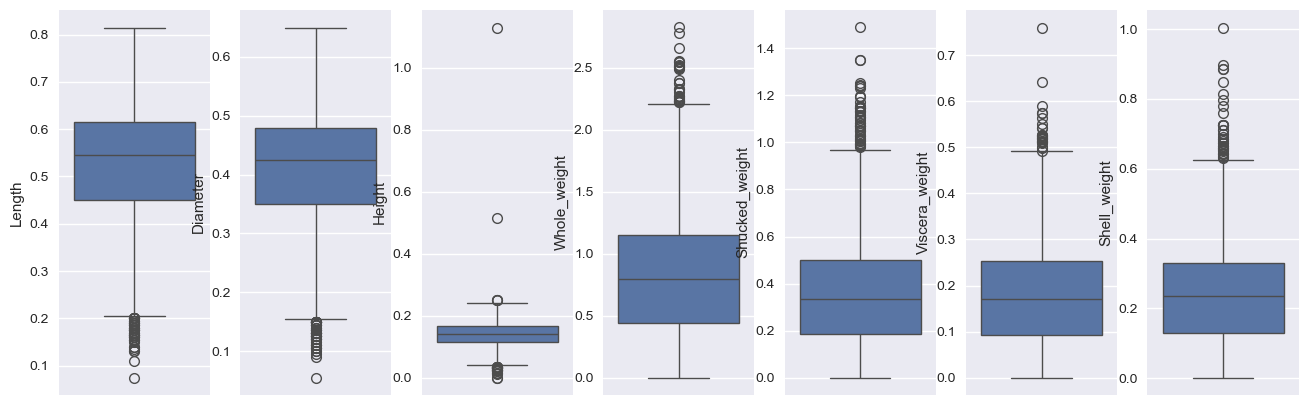

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=7, figsize = (16,5))
i = 0
for feature in features:
    sns.boxplot(numerical_X[feature], ax = ax[i], vert = True)
    i +=1
    
plt.show()